# MTH 4224 / CSE 4224 - Homework 1

**Deadline**: Jan 27, 2024

**Points**: 35

**Note**: I did give some hints, but I did not teach about every built-in function you're going to need to use. This will *always* be the situation in real life. Be resourceful, read the documentation, Google your errors.

**Academic Honesty**: Write your code from scratch. Learn from the Internet, talk to classmates or friends, ask me questions, but don't just copy blocks of code. Every submission we grade should be unique.

### Instructions

Submit **one** Python notebook file for grading. Your file must include **mathematical work** (type it or insert pictures of your handwritten work), **text explanations** of your work, **well-commented code**, and the **outputs** from your code.

### Problems

1. Ridge regression is a modified version of linear regression that penelizes the coefficients for being large. It accomplishes this by adding a so-called $L^2$ penalty term to the loss function (e.g. mean squared error): $L(\theta)=\frac{1}{n}\sum\limits_{i=1}^n \left(\hat{f}(x_i)-y_i\right)^2 + \lambda\sum\limits_{i=1}^d \theta_i^2$

    where $\lambda>0$ is a **hyperparameter** that must be tuned by the user. An appropriate choice of $\lambda$ can often help with learning datasets where the input features are highly correlated or it can help with an overfitting problem.

    a. **[5 points]** Write each part of $L(\theta)$ in matrix-vector form where $\hat{f}$ is a LBF expansion regression model. Define each matrix and vector separately by writing their elements with subscripts, and state their dimensions.

    b. **[5 points]** Solve the following optimization problem by hand for the loss function $L$ above $\min\limits_{\theta\in\mathbb{R}^{d+1}} L(\theta)$

    c. **[5 points]** Write a Python class for this ridge LBF expansion regression model with a `fit` function applying the formula from part (b) to compute the parameters $\theta$ and a `predict` function to make predictions for input data after the model has been fit.

2. Use the details about houses in a real estate dataset and attempt to predict the list price for the houses. Use the [Mount Pleasant Real Estate dataset](https://www.hawkeslearning.com/Statistics/dis/datasets.html).

    a. **[5 points]** Read the dataset into Python and preprocess data excluding the "Misc Exterior" and "Amenities" columns into an appropriate data matrix for regression analysis. Randomly split the data into a training set, validation set, and test set at 60\%/20\%/20\%.

    b. **[5 points]** Fit the least squares hyperplane to the training set to predict house prices, and evaluate its fit on the validation set.
    
    c. **[5 points]** Fit a ridge regression to the training set to predict house prices, and evaluate its fit on the validation set. Repeat this for several different values of $\lambda$.
     
    d. **[5 points]** Fit an LBF expansion of your choice to the training set to predict house prices, and evaluate its fit on the validation set. Repeat this for several different values of $\lambda$

Document all experiments and conclude which experiment works best based on an appropriate train/validation/test split. Report your best test-set MAE at the end of your submission.

**The best three models in the class as evaluated once on the test set will earn +5 bonus points. (You must turn in your work on time, appropriate train/val/test split, and report your best MAE at the bottom of your report to be eligible.)**


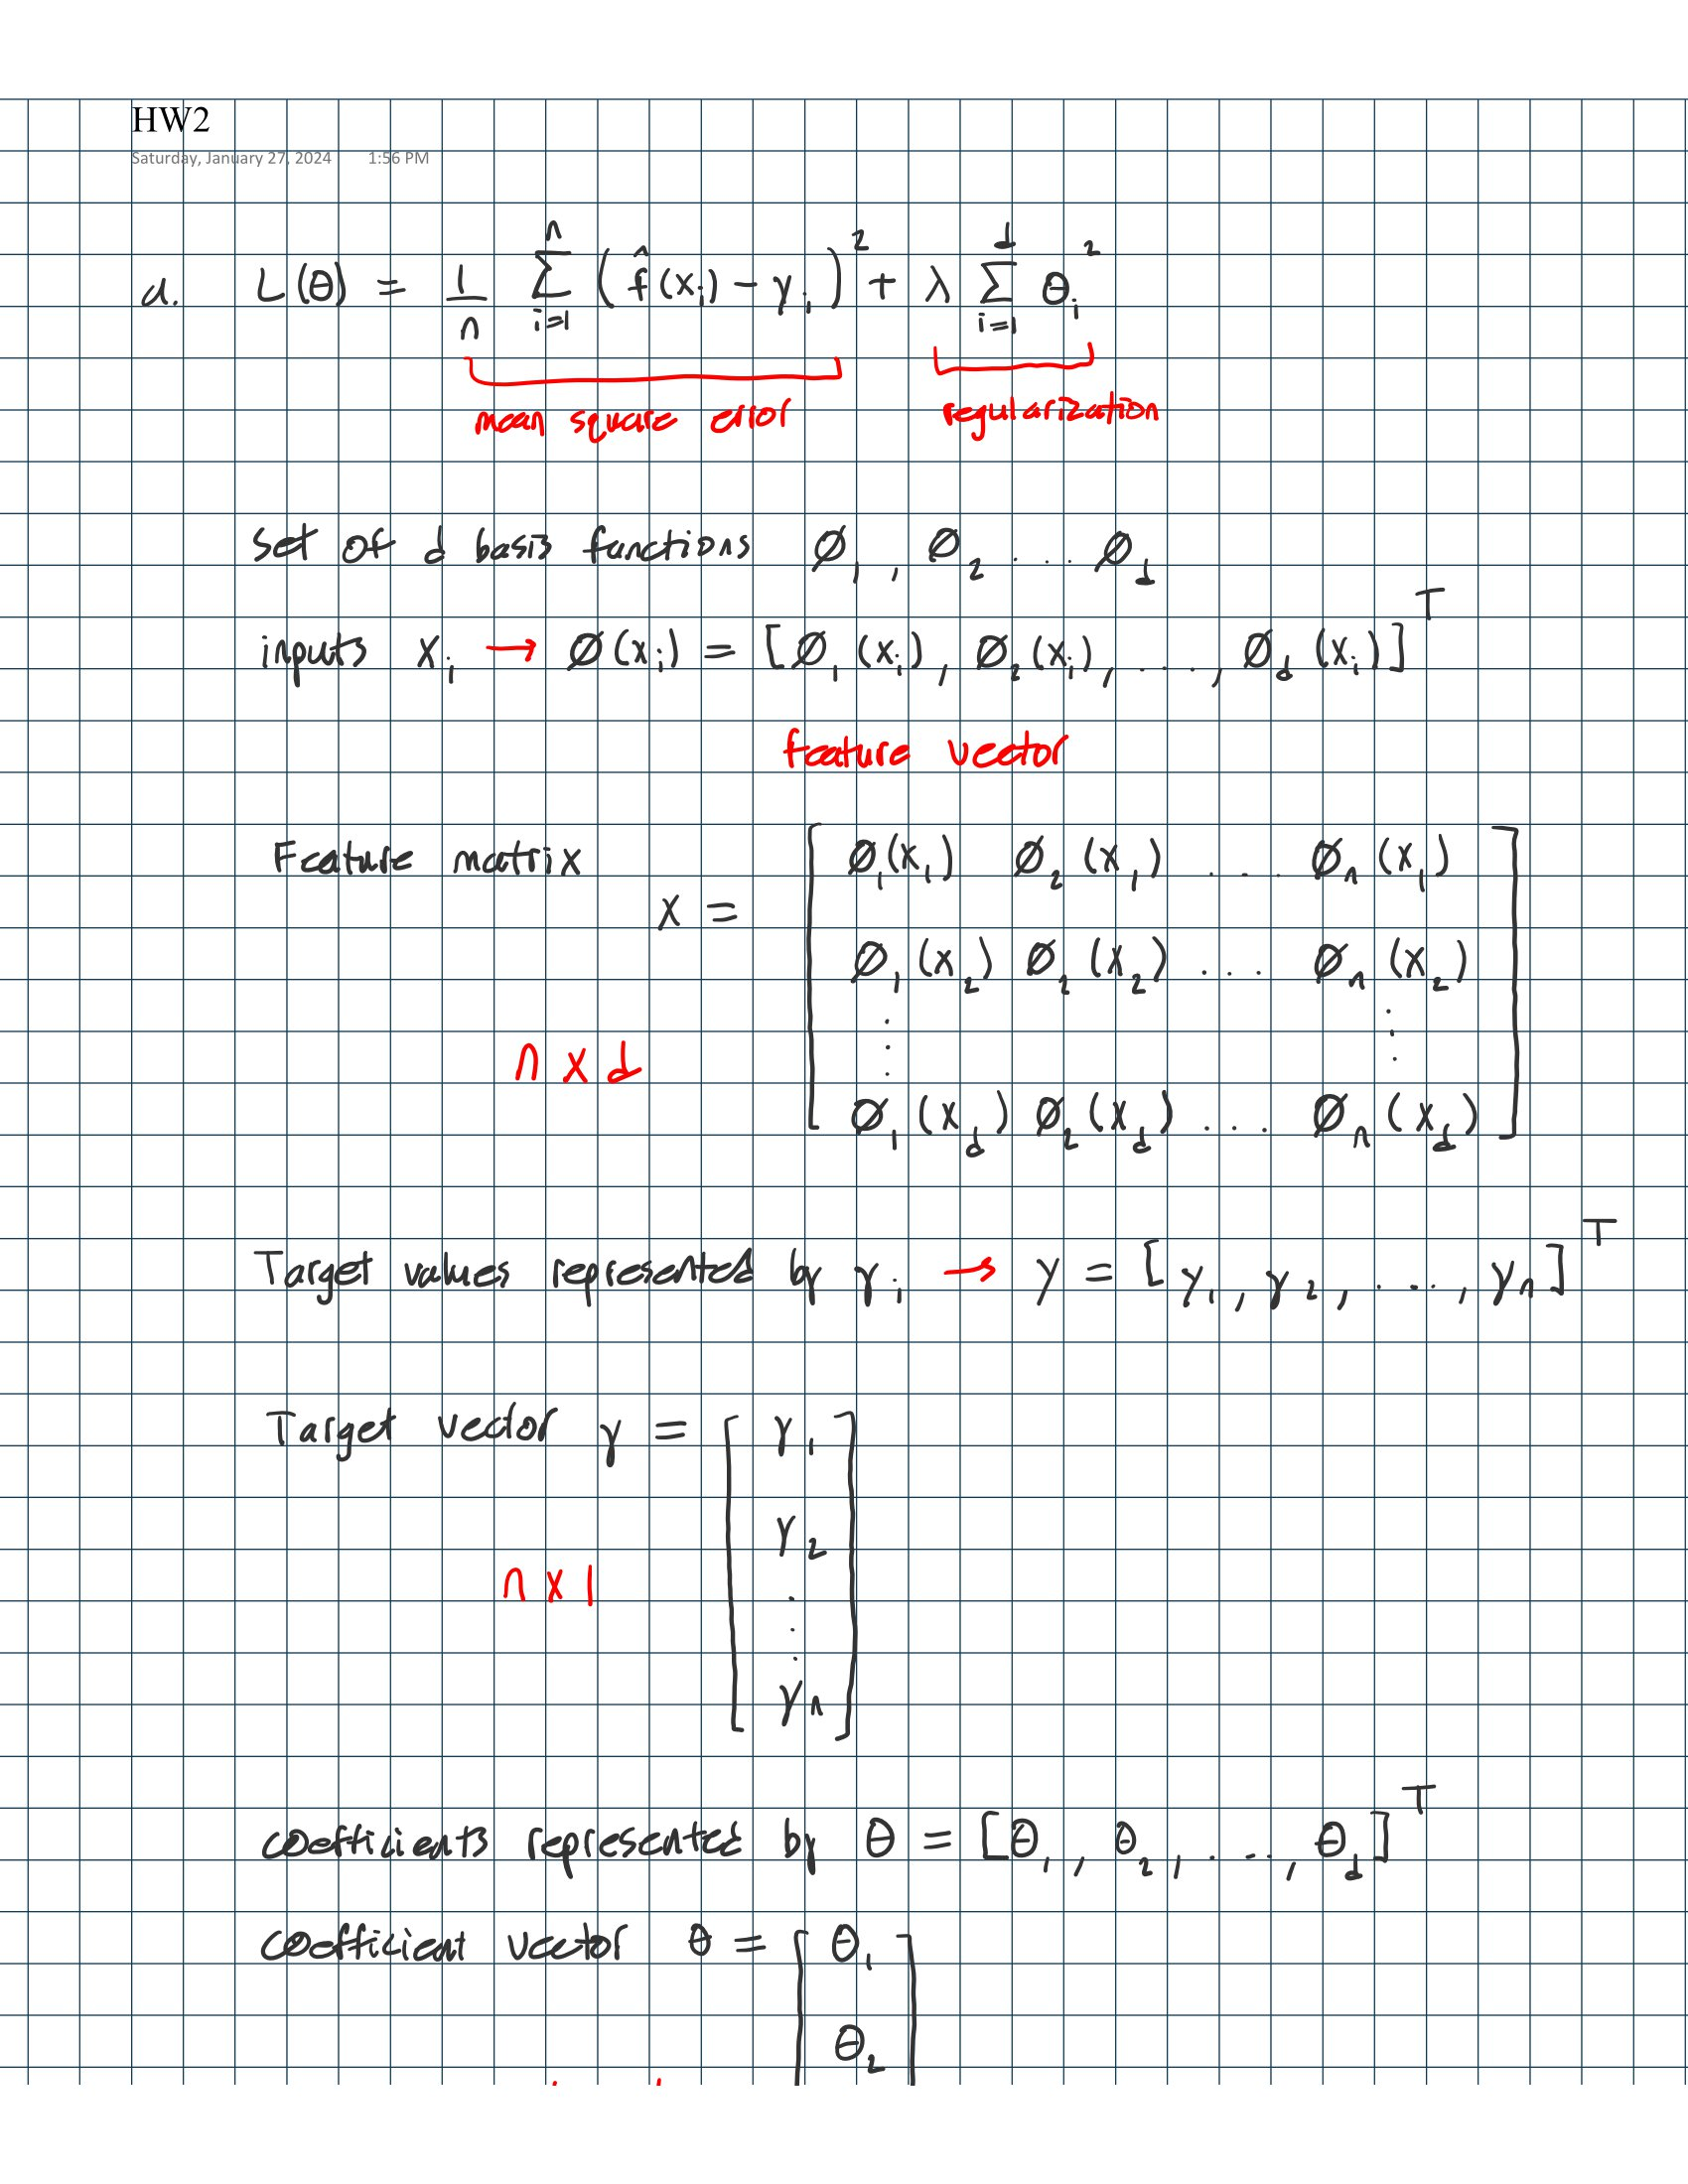


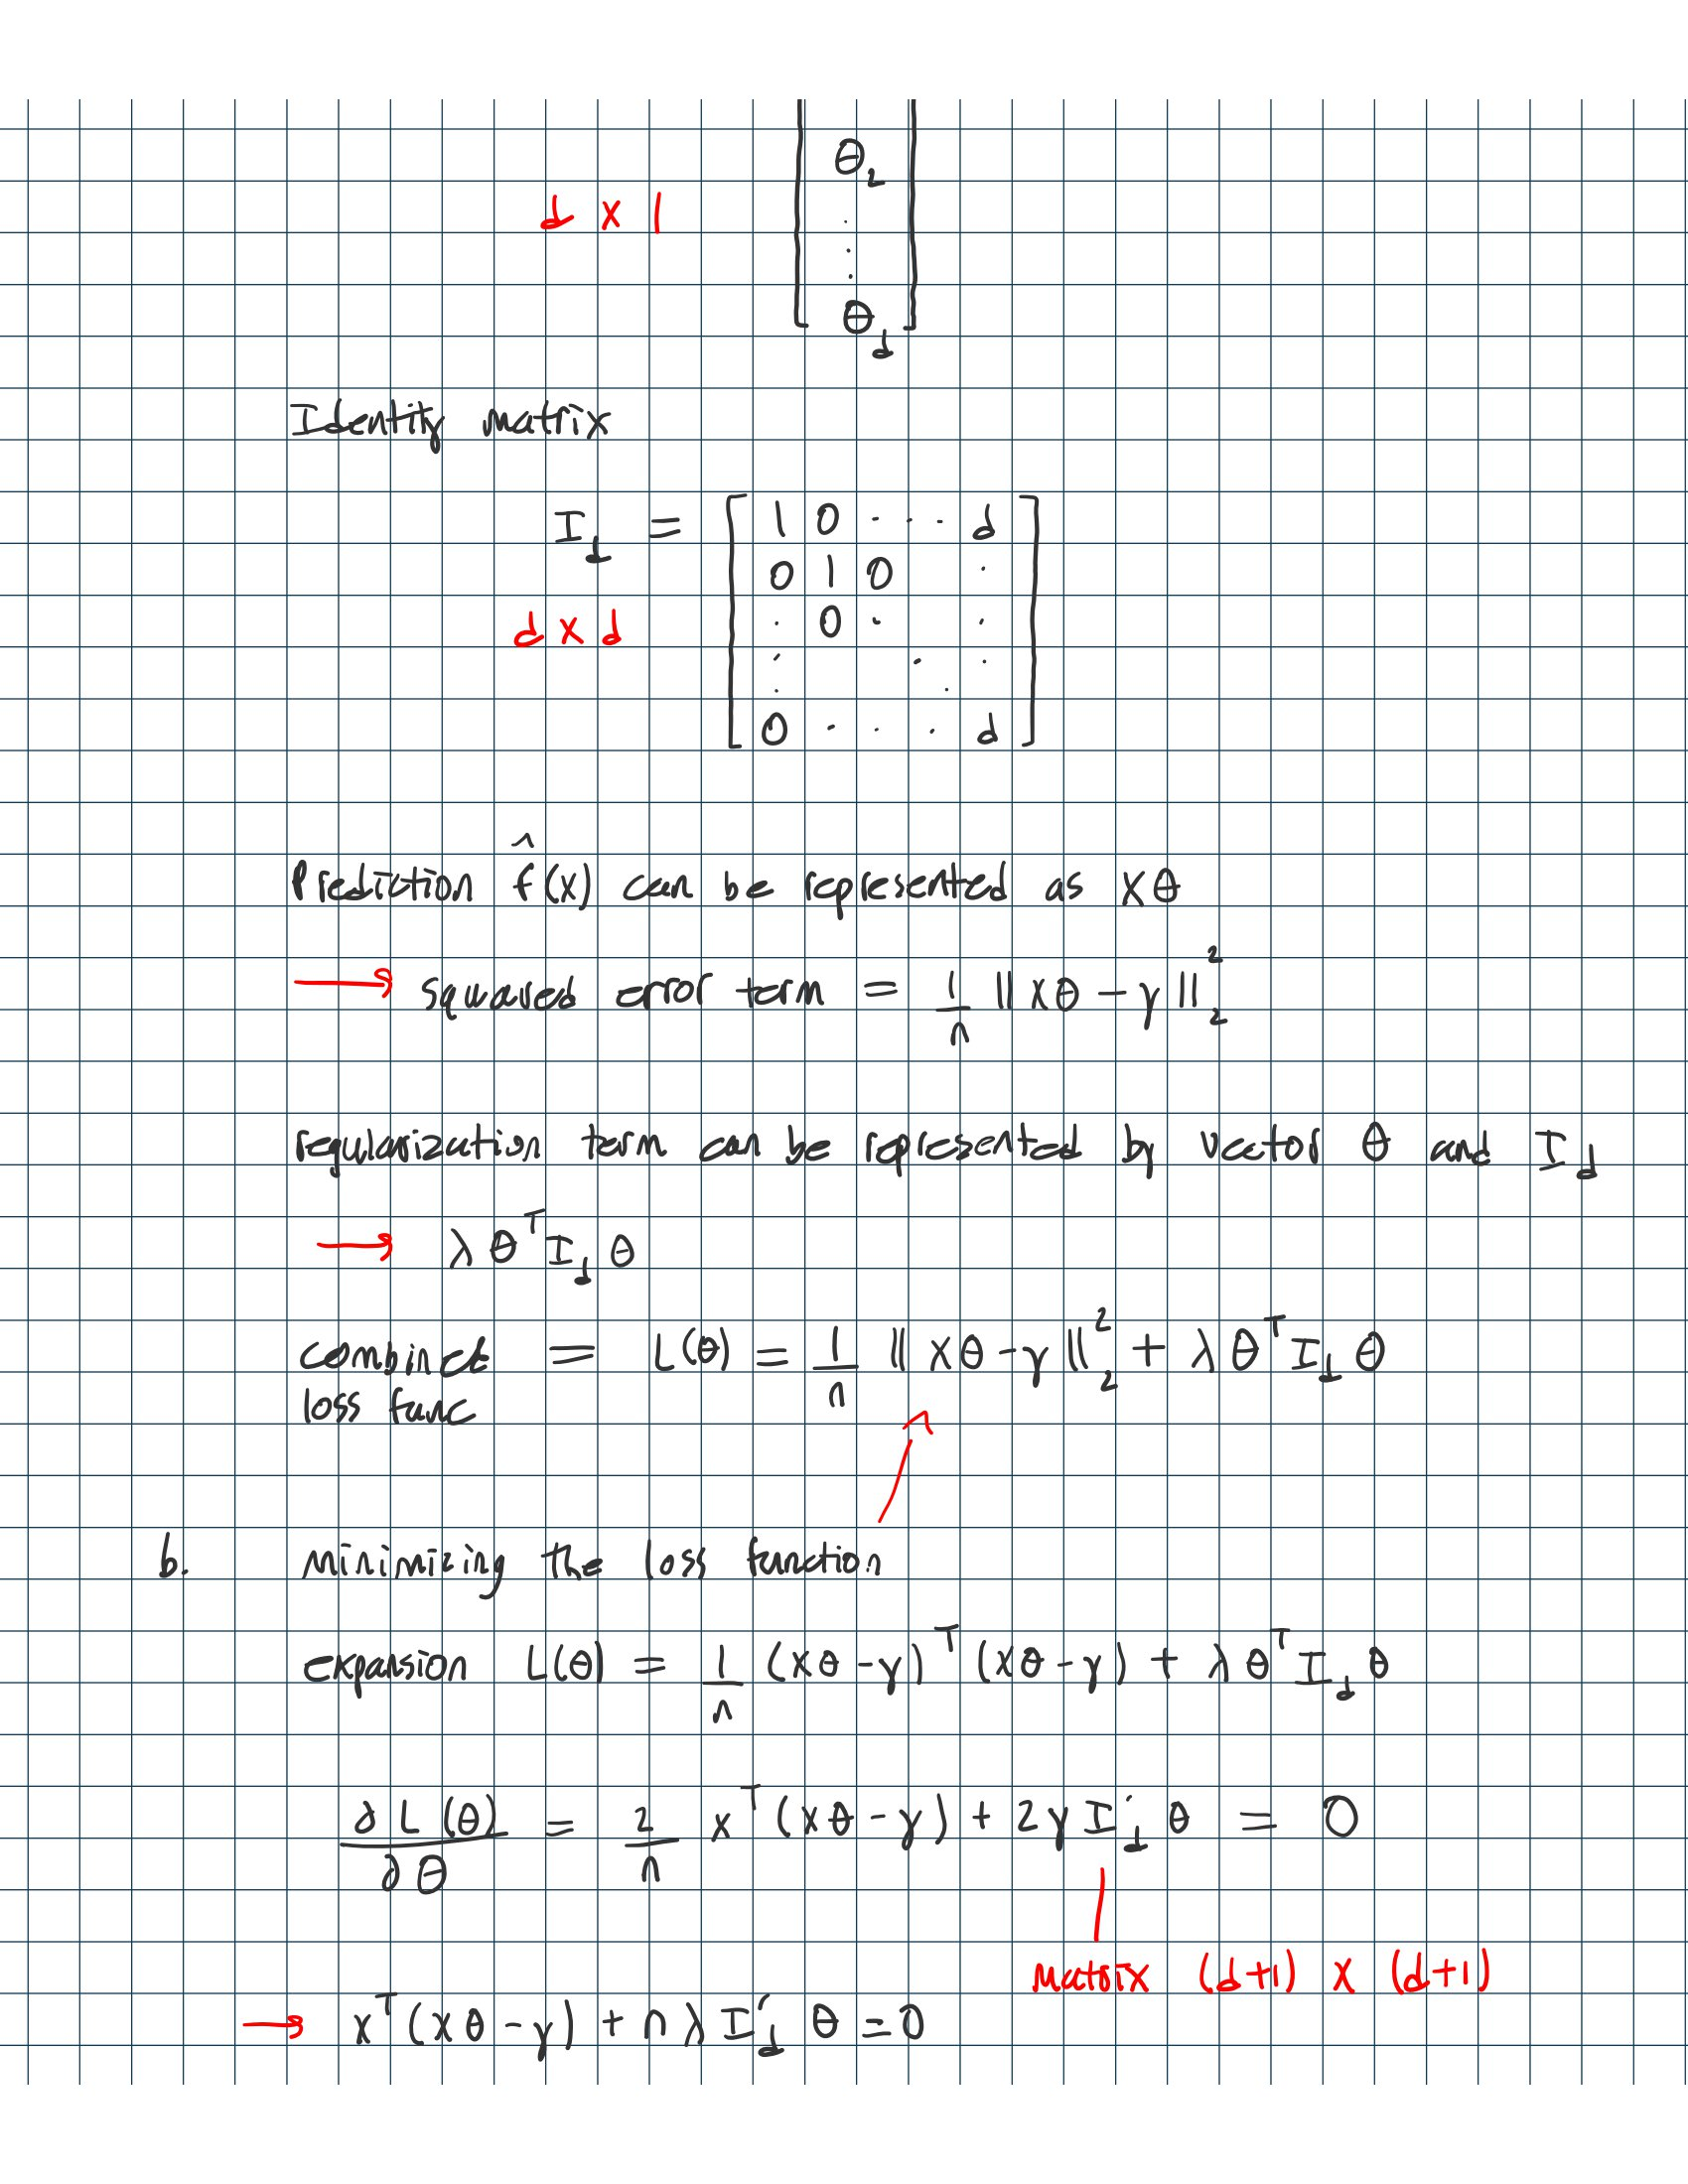


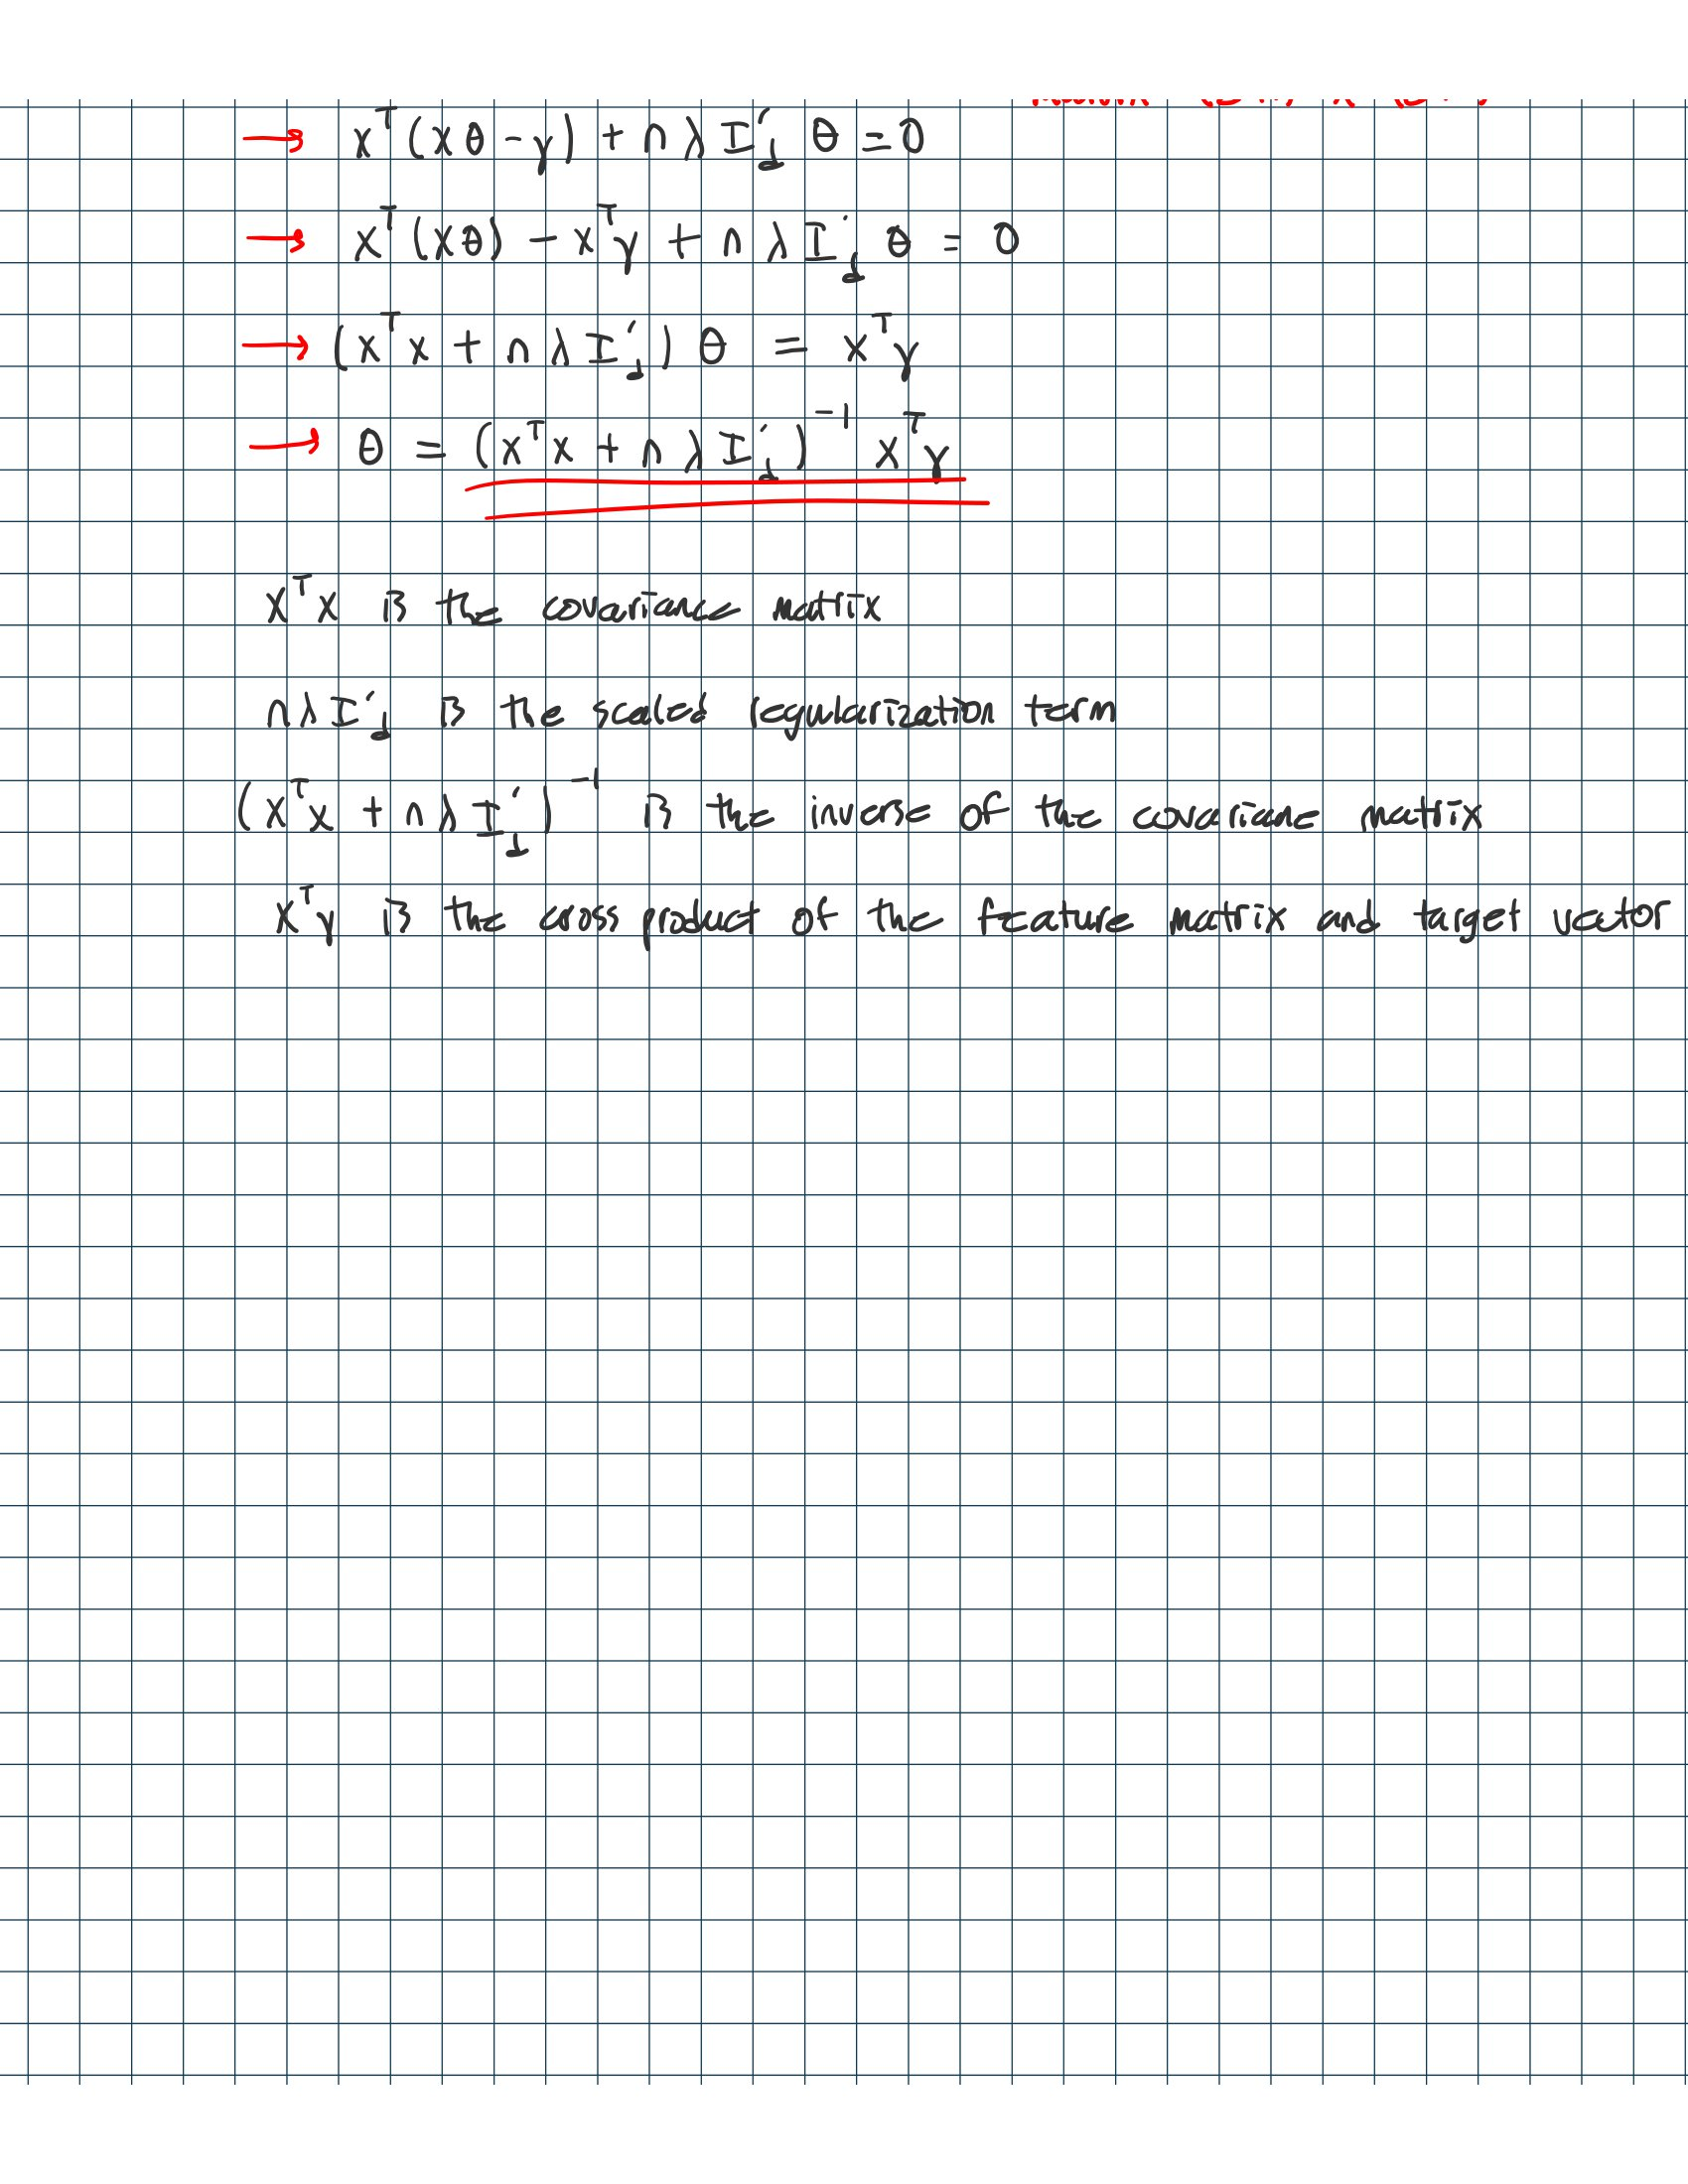

In [9]:
import base64
from IPython.display import HTML

with open(".ipynb_checkpoints/MachineLearningHW2-1.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()
    
display(HTML(f'<img src="data:image/png;base64,{encoded_string}"/>'))

with open(".ipynb_checkpoints/MachineLearningHW2-2.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()
    
display(HTML(f'<img src="data:image/png;base64,{encoded_string}"/>'))

with open(".ipynb_checkpoints/MachineLearningHW2-3.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()
    
display(HTML(f'<img src="data:image/png;base64,{encoded_string}"/>'))

In [10]:

import numpy as np

class RidgeLBFRegression:
    def __init__(self, lambda_param=1.0):
        self.lambda_param = lambda_param  ### Regularization parameter
        self.theta = None  ### Coefficients after fitting the model

    def fit(self, X, y):

        n, d = X.shape

        ### Add a column of ones to include the intercept 
        X_intercept = np.hstack([np.ones((n, 1)), X])

        ### Set the first diagonal element to 0, excluding intercept from regularization
        I_d = np.eye(d + 1)
        I_d[0, 0] = 0

        ### Compute coefficients
        self.theta = np.linalg.inv(X_intercept.T @ X_intercept + self.lambda_param * n * I_d) @ X_intercept.T @ y

    def predict(self, X):
        
        ### Check if the model is fitted
        if self.theta is None:
            raise ValueError("Model has not been fitted yet. Please call the 'fit' method first.")

        ### Add a column of ones for intercept
        X_intercept = np.hstack([np.ones((X.shape[0], 1)), X])

        ### Predictions
        return X_intercept @ self.theta


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression  # Ensure this is imported if not already

### Function to convert price to float 
def convert_price(df, column_name):
    df[column_name] = df[column_name].replace('[\$,]', '', regex=True).astype(float)

### Read data
df = pd.read_csv('.ipynb_checkpoints/Mount_Pleasant_Real_Estate_Data.csv')

### Convert list price to float
convert_price(df, 'List Price')

### Drop misc exterior and amenities
df = df.drop(['Misc Exterior', 'Amenities'], axis=1)

### Separate list price so that it doesn't get one-hot encoded
y = df['List Price'].values
df_features = df.drop('List Price', axis=1)

### Apply one-hot encoding to everything but list price
df_features = pd.get_dummies(df_features)

### Handling null values
df_features.fillna(df_features.median(), inplace=True)

### Ensure null values removed
y = pd.DataFrame(y, columns=['List Price']).fillna(df['List Price'].median()).values.ravel()

### Features and list price back into df
df_processed = pd.concat([df_features, pd.DataFrame(y, columns=['List Price'])], axis=1)

### Splitting 60/20/20
X = df_processed.drop('List Price', axis=1).values
y = df_processed['List Price'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)  ### 60 training
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)  ### 20 val 20 test

X_train, X_val = X_train.astype(float), X_val.astype(float) 

lambda_values = [0.01, 0.1, 1, 10, 100]

#### Function for LBF expansion 
def expand_with_LBF(X, degree=2):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X)

### Fitting linear regression 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  
y_val_pred_lin = lin_reg.predict(X_val)  ### Predict on val
val_mae_lin = mean_absolute_error(y_val, y_val_pred_lin)  ### Evaluate on val
print(f'Val MAE (Linear Regression): {val_mae_lin:.2f}')

### Ridge regression
print("\nRidge Regression:")
for lambda_param in lambda_values:
    ridge_model = RidgeLBFRegression(lambda_param=lambda_param)
    ridge_model.fit(X_train, y_train) 
    y_val_pred_ridge = ridge_model.predict(X_val)  ### Predicting on val
    val_mae_ridge = mean_absolute_error(y_val, y_val_pred_ridge)  ### Evaluate on val
    print(f'Val MAE (Ridge, Lambda={lambda_param}): {val_mae_ridge:.2f}')

### Ridge with LBF expansion 
print("\nRidge Regression with LBF Expansion:")
for lambda_param in lambda_values:
    model = RidgeLBFRegression(lambda_param=lambda_param)
    X_train_expanded = expand_with_LBF(X_train, degree=2)  ### LBF transform
    model.fit(X_train_expanded, y_train) 
    X_val_expanded = expand_with_LBF(X_val, degree=2)  ### LBF transform val
    y_val_pred = model.predict(X_val_expanded)  ### Predicting on val
    val_mae = mean_absolute_error(y_val, y_val_pred)  ### Evaluate on val
    print(f'Val MAE (Ridge LBF, Lambda={lambda_param}): {val_mae:.2f}')

### Selecting best lambda
best_lambda = 10
print(f"\nRetraining with best lambda={best_lambda} and combined training and validation sets...")
best_model = RidgeLBFRegression(lambda_param=best_lambda)
X_train_val_expanded = expand_with_LBF(np.concatenate((X_train, X_val)), degree=2)
y_train_val = np.concatenate((y_train, y_val))
best_model.fit(X_train_val_expanded, y_train_val)

### Predicting and evaluation
X_test_expanded = expand_with_LBF(X_test, degree=2)
y_test_pred = best_model.predict(X_test_expanded)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f'Test MAE (Best Lambda={best_lambda}): {test_mae:.2f}')


Val MAE (Linear Regression): 85980.75

Ridge Regression:
Val MAE (Ridge, Lambda=0.01): 87647.86
Val MAE (Ridge, Lambda=0.1): 98701.73
Val MAE (Ridge, Lambda=1): 119142.23
Val MAE (Ridge, Lambda=10): 125893.34
Val MAE (Ridge, Lambda=100): 126538.03

Ridge Regression with LBF Expansion:
Val MAE (Ridge LBF, Lambda=0.01): 123611.51
Val MAE (Ridge LBF, Lambda=0.1): 106494.55
Val MAE (Ridge LBF, Lambda=1): 78681.25
Val MAE (Ridge LBF, Lambda=10): 74419.24
Val MAE (Ridge LBF, Lambda=100): 87558.42

Retraining with best lambda=10 and combined training and validation sets...
Test MAE (Best Lambda=10): 66543.84
